## Assignment 6 - Knock Airport Weather

**Introduction**

In this assignment, you will analyze and visualize temperature and windspeed trends using weather data. Your task is to create a Python script or notebook based on the dataset provided at the link below.

**Dataset Link:** Hourly Climate Data

This assignment is divided into two parts:

**Temperature Analysis (60%)**
1. Plot the temperature data.
2. Calculate and plot the mean temperature for each day.
3. Calculate and plot the mean temperature for each month.

**Windspeed Analysis (40%)**
1. Plot the windspeed, ensuring to handle any missing data appropriately.
2. Calculate and plot the rolling windspeed (e.g., over 24 hours).
3. Determine and plot the maximum windspeed for each day.
4. Calculate and plot the monthly mean of the daily maximum windspeeds.

Bye: Carlos Rigueti

### Data information

****


Station Name: KNOCK AIRPORT

Station Height: 201 M

Latitude: 53.906, Longitude: -8.817

date: Date and Time (utc)

rain: Precipitation Amount (mm)

temp: Air Temperature (°C)

wetb: Wet Bulb Temperature (°C)

dewpt: Dew Point Temperature (°C)

rhum: Relative Humidity (%)

vappr: Vapour Pressure (hPa)

msl: Mean Sea Level Pressure (hPa)

wdsp: Mean Wind Speed (knot)

wddir: Predominant Wind Direction (degree)

ww: Synop code for Present Weather

w: Synop code for Past Weather

sun: Sunshine duration (hours)

vis: Visibility (m)

clht: Cloud height (100's of ft) - 999 if none

clamt: Cloud amount

ind: Indicator

### Data Load

****

In [138]:
# Importing the 'pandas' library for data manipulation and analysis.
import pandas as pd
# Import matplotlib.pyplot for creating static, interactive, and publication-quality visualizations
import matplotlib.pyplot as plt
# Import seaborn for enhancing Matplotlib with aesthetically pleasing statistical graphics
import seaborn as sns 


In [139]:
# Load the weather dataset from the CSV file into a DataFrame, disabling memory optimization to handle large datasets reliably. 
df = pd.read_csv("dataweather.csv", low_memory=False)
# Display the successful loading
print(df)

                     date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  \
0       10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0   
1       31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0   
2       31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0   
3       31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0   
4       31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0   
...                   ...  ...  ...    ...   ...    ...   ...    ...    ...   
247669  31-oct-2024 20:00    0  0.2      0  10.1      0  10.1   10.1   12.4   
247670  31-oct-2024 21:00    0  0.1      0  10.1      0  10.1   10.0   12.4   
247671  31-oct-2024 22:00    0  0.0      0  10.0      0  10.0   10.0   12.3   
247672  31-oct-2024 23:00    0  0.1      0   9.8      0   9.8    9.8   12.1   
247673  01-nov-2024 00:00    0  0.0      0   9.7      0   9.6    9.6   11.9   

        rhum  ... ind.3  wdsp ind.4  wddir  ww   w 

### Inspect Data

****


In [140]:
# Convert the 'date and time' column to a pandas datetime object for consistent timestamp processing.
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
# Display the successful loading.
print (df['date'])

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247669   2024-10-31 20:00:00
247670   2024-10-31 21:00:00
247671   2024-10-31 22:00:00
247672   2024-10-31 23:00:00
247673   2024-11-01 00:00:00
Name: date, Length: 247674, dtype: datetime64[ns]


In [141]:
# Display a summary of the dataset, including column names, data types, and non-null counts.
info = df.info ()
# Display the successful loading.
print (info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    247674 non-null  datetime64[ns]
 1   ind     247674 non-null  int64         
 2   rain    247674 non-null  object        
 3   ind.1   247674 non-null  int64         
 4   temp    247674 non-null  float64       
 5   ind.2   247674 non-null  int64         
 6   wetb    247674 non-null  float64       
 7   dewpt   247674 non-null  float64       
 8   vappr   247674 non-null  float64       
 9   rhum    247674 non-null  int64         
 10  msl     247674 non-null  object        
 11  ind.3   247674 non-null  int64         
 12  wdsp    247674 non-null  object        
 13  ind.4   247674 non-null  int64         
 14  wddir   247674 non-null  object        
 15  ww      247674 non-null  object        
 16  w       247674 non-null  object        
 17  sun     247674 non-null  floa

In [142]:
# Convert the 'Mean Wind Speed' column from an object data type to numeric for accurate calculations and analysis.
columns_to_convert = ['wdsp'] 

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [143]:
# Display detailed information about the dataset, including column names, data types, and non-null value counts.
wind_info = df['wdsp'].dtype
print (wind_info)

float64


In [144]:
# Count the number of null values in each column to identify missing data.
isnull = df.isnull().sum()
print (isnull)

date      0
ind       0
rain      0
ind.1     0
temp      0
ind.2     0
wetb      0
dewpt     0
vappr     0
rhum      0
msl       0
ind.3     0
wdsp     50
ind.4     0
wddir     0
ww        0
w         0
sun       0
vis       0
clht      0
clamt     0
dtype: int64


In [145]:
# Convert specific columns to numeric data types to enable mathematical operations and analyses.
data['temp'] = pd.to_numeric(data['temp'], errors='coerce')  # Temperature
data['wdsp'] = pd.to_numeric(data['wdsp'], errors='coerce')  # Windspeed


In [146]:
# Apply a clean and consistent style to all plots for better readability and present
sns.set_theme(style="whitegrid")

In [147]:
# Calculate the total number of null values in each column to assess the completeness of the dataset.
isnull = df.isnull().sum()
print (isnull)

date      0
ind       0
rain      0
ind.1     0
temp      0
ind.2     0
wetb      0
dewpt     0
vappr     0
rhum      0
msl       0
ind.3     0
wdsp     50
ind.4     0
wddir     0
ww        0
w         0
sun       0
vis       0
clht      0
clamt     0
dtype: int64


In [148]:
# Generate descriptive statistics for the 'Air Temperature (°C)' and 'Mean Wind Speed (knot)' columns to summarize their distributions.
describe = df[['temp', 'wdsp']].describe()
print(describe)

               temp           wdsp
count  247674.00000  247624.000000
mean        8.76682       9.459556
std         4.60478       4.936053
min        -6.90000       0.000000
25%         5.40000       6.000000
50%         8.80000       9.000000
75%        12.00000      12.000000
max        28.50000      50.000000


### Plot Temperature

****

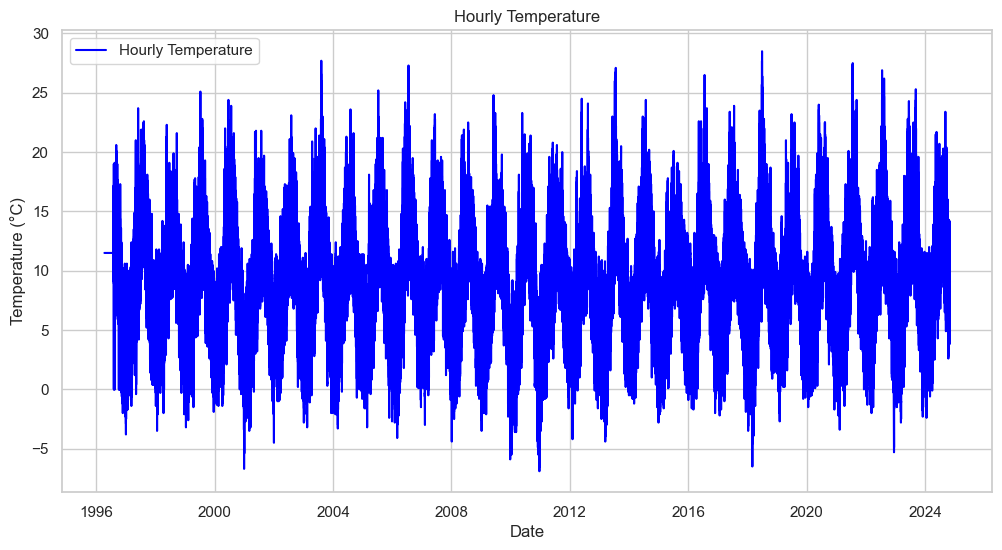

In [149]:
# 1. Plot hourly temperature
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['temp'], label='Hourly Temperature', color='blue')
plt.title('Hourly Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

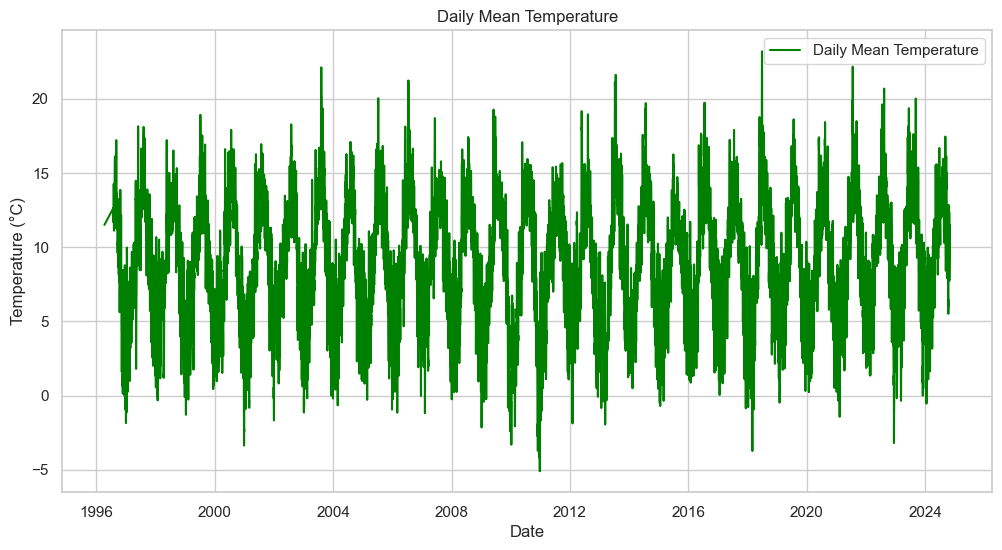

In [150]:
# 2. Plot mean temperature per day
daily_mean_temp = data.groupby(data['date'].dt.date)['temp'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, label='Daily Mean Temperature', color='green')
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

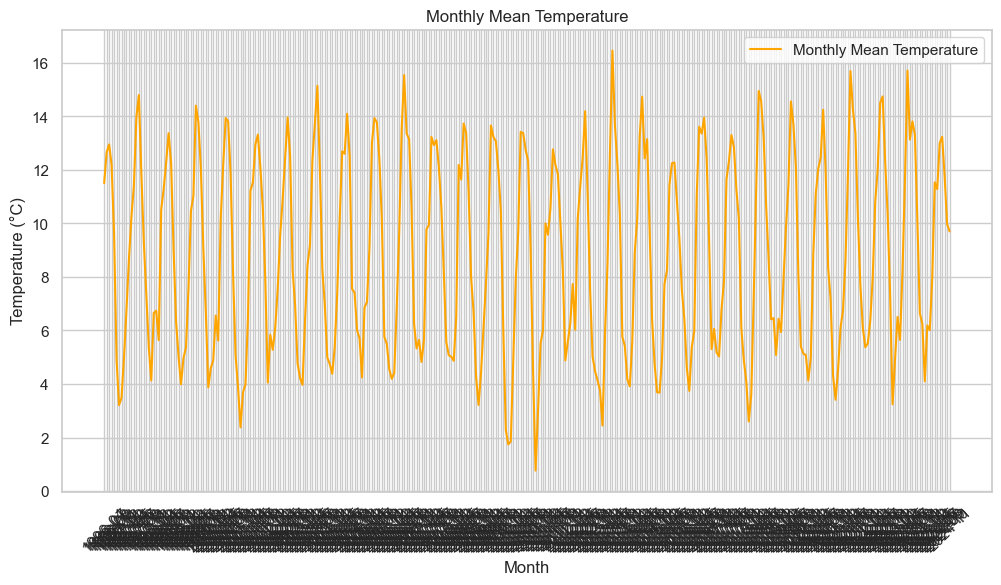

In [151]:

# 3. Plot mean temperature per month
data['month'] = data['date'].dt.to_period('M')  # Extract month
monthly_mean_temp = data.groupby('month')['temp'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_temp.index.astype(str), monthly_mean_temp.values, label='Monthly Mean Temperature', color='orange')
plt.title('Monthly Mean Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

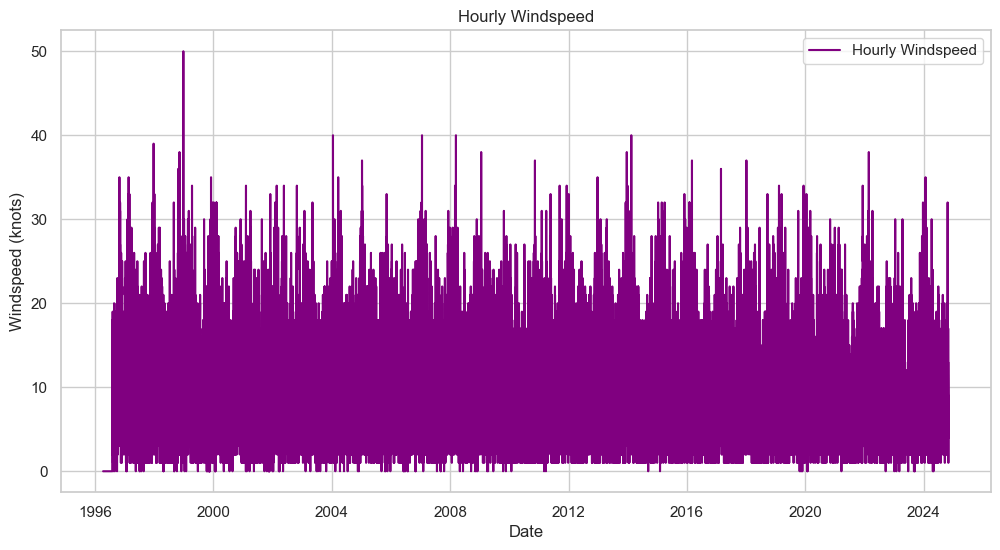

In [152]:
# 4. Plot hourly windspeed
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['wdsp'], label='Hourly Windspeed', color='purple')
plt.title('Hourly Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.show()


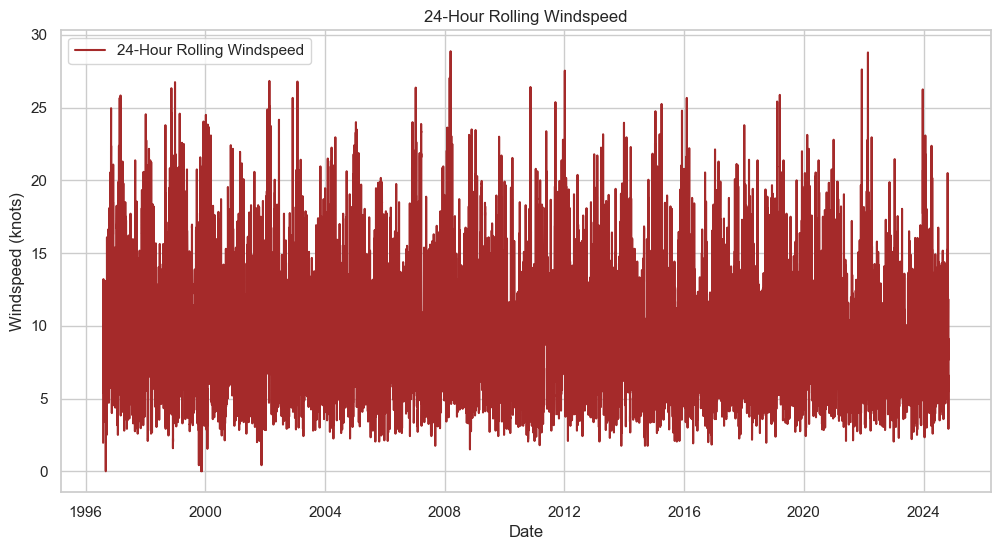

In [153]:
# 5. Plot 24-hour rolling windspeed
rolling_wind = data['wdsp'].rolling(window=24).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['date'], rolling_wind, label='24-Hour Rolling Windspeed', color='brown')
plt.title('24-Hour Rolling Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.show()

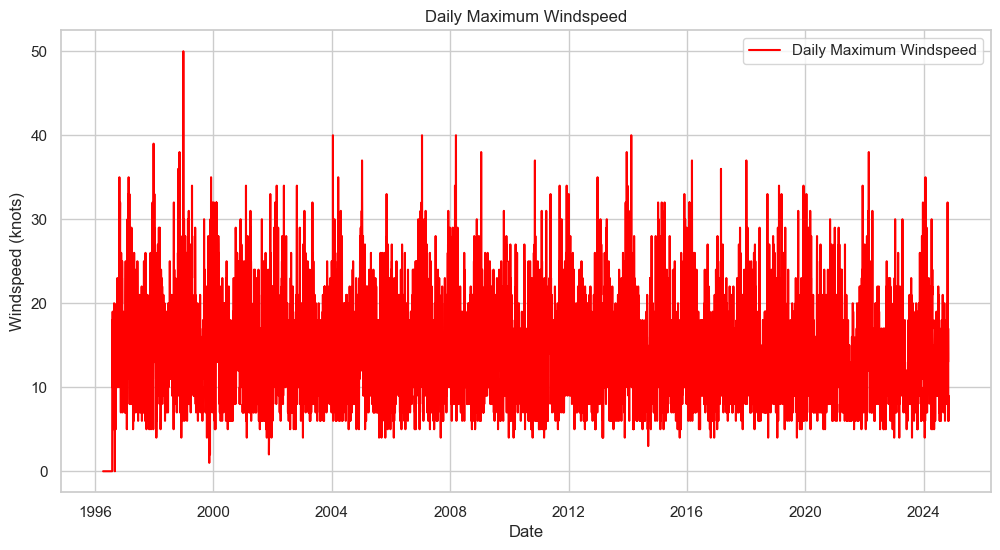

In [154]:
# 6. Plot maximum daily windspeed
daily_max_wind = data.groupby(data['date'].dt.date)['wdsp'].max()
plt.figure(figsize=(12, 6))
plt.plot(daily_max_wind.index, daily_max_wind.values, label='Daily Maximum Windspeed', color='red')
plt.title('Daily Maximum Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.show()

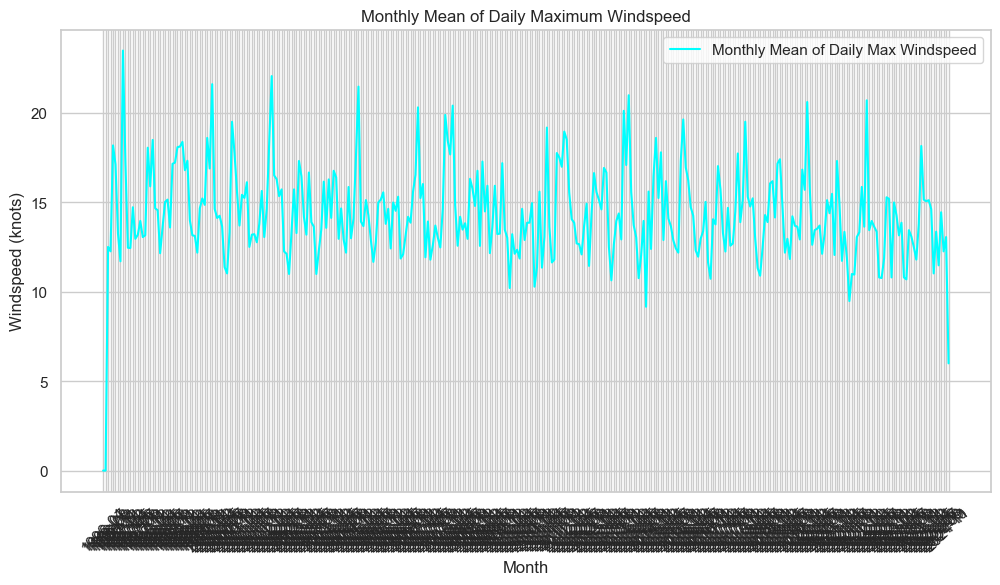

In [155]:
# 7. Plot monthly mean of daily maximum windspeed
daily_max_wind_df = daily_max_wind.reset_index()  
daily_max_wind_df['date'] = pd.to_datetime(daily_max_wind_df['date'])  
daily_max_wind_df['month'] = daily_max_wind_df['date'].dt.to_period('M')  

# Calculate monthly mean of daily maximum windspeed
monthly_mean_max_wind = daily_max_wind_df.groupby('month')['wdsp'].mean()

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_max_wind.index.astype(str), monthly_mean_max_wind.values, 
         label='Monthly Mean of Daily Max Windspeed', color='cyan')
plt.title('Monthly Mean of Daily Maximum Windspeed')
plt.xlabel('Month')
plt.ylabel('Windspeed (knots)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Reference

**Pandas Documentation: 10 Minutes to Pandas**  
A brief introduction to the Pandas library, covering essential functionalities such as creating and manipulating DataFrames.  
Available at: https://pandas.pydata.org/docs/user_guide/10min.html.  

**Matplotlib: Pyplot Tutorial**  
A comprehensive guide to using Matplotlib’s Pyplot module for creating a wide range of plots and visualizations.  
Available at: https://matplotlib.org/2.0.2/users/pyplot_tutorial.html.  

**Read a CSV File into a DataFrame (pd.read_csv)**  
Detailed documentation for loading CSV files into a Pandas DataFrame, with options for handling large datasets.  
Available at: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html.  

**Convert Arguments to Datetime (pd.to_datetime)**  
Information on converting various formats of date and time data into a Pandas datetime object for easier manipulation.  
Available at: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html.  

**Convert Data to Numeric Type (pd.to_numeric)**  
A guide to converting columns to numeric data types, which is useful for performing mathematical operations and handling non-numeric values.  
Available at: https://www.geeksforgeeks.org/python-pandas-to_numeric-method/.  

**Convert Datetime to Period with Frequency (pd.Series.dt.to_period)**  
Instructions for converting datetime series into period series, allowing for aggregation by frequency (e.g., monthly or yearly).  
Available at: https://www.geeksforgeeks.org/pandas-series-dt-to_period/.  

[7] **Remove Missing Values (.dropna)**  
Documentation on removing rows or columns with missing values to clean datasets before analysis.  
Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html.  